In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import joblib

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
df1.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21,column22,column23,column24,column25,column26,column27,column28,column29,column30,column31,column32,column33,column34,column35,column36,column37,column38,column39,column40,column41,column42,column43,column44,column45,column46,column47,column48,column49,column50,column51,column52,column53,column54,column55,column56,column57,column58,column59,column60,column61,column62,column63,column64,column65,column66,column67,column68,column69,column70,column71,column72,column73,column74,column75,column76,column77,column78,column79,column80,column81,column82,column83,column84,column85,column86,column87,column88,column89,column90,column91,column92,column93,column94,column95,column96
0,2021,8039501,20.213.100.000.194,05/02/2021,08/02/2021 09:18,ASS,3101,3100,450.0,7,SINM,O,N,NaN,N,NaN,1.0,P2,73.001.306.192,2.0,01/01/2021,31/12/2021 23:59,01/01/2021,01/01/2022,ANN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2882448.0,$ASSU,550.0,NaN,$HCI,22413-A-38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4700,0,5420,31TC-,314,10.0,N,NaN,NaN
1,2021,8012702,20.213.100.000.130,13/01/2021,26/01/2021 15:53,ASS,3101,3100,270.0,540,SINM,O,O,4.0,N,NaN,2.0,P13,5.403.101.379.891,1.0,08/11/2019,07/11/2021 23:59,08/11/2020,NaN,ANN,OPEL,VIVARO,339.0,26845-B-15,07/11/2018,200000,200000,Diesel,NaN,6.0,3,NaN,M,16/11/1973,18/12/1995,270.0,1,O,O,O,O,O,208.0,O,213.0,N,NaN,O,3000,3,"5277,16",2874750.0,$ASSU,270.0,NaN,$CIF,26845-B-15,270.0,306.0,03/076741,18/12/1995,NaN,908.0,"3,93E+12",$CIF,NaN,NaN,V.W,362252,90578-A-15,NaN,NaN,NaN,NaN,NaN,NaN,$CIF,3.0,Cas 3,0.0,100.0,0,1700,0,2420,31DC-31RC-,NaN,NaN,N,NaN,NaN
2,2021,8005901,20.213.100.000.029,04/01/2021 15:30,07/01/2021 14:10,ASS,3101,3100,450.0,546,SINM,P,O,5.0,N,NaN,20.0,P11,5.463.101.374.539,2.0,02/06/2006,03/06/2021 23:59,04/06/2020,04/06/2021,ANN,KIA,SDT22CRT,339.0,44340-A-26,02/06/2006,110592,110592,Diesel,NaN,11.0,NaN,NaN,M,17/12/1962,08/04/2002,450.0,"0,9",O,O,O,N,N,NaN,N,NaN,N,NaN,N,NaN,3,"4088,28",2863026.0,$ASSU,450.0,NaN,$CIF,19318-B-26,450.0,306.0,"7,81E+11",08/04/2002,NaN,908.0,"2,59E+12",$CIF,NaN,NaN,TOYOTA,DA36,08491-B-26,NaN,NaN,NaN,NaN,NaN,NaN,$CIF,4.0,Cas 4,50.0,50.0,0,"2631,5",0,"3351,5",31RC-,5918,450.0,N,NaN,NaN
3,2021,8008955,20.213.100.000.075,14/01/2021,16/01/2021 12:17,ASS,3101,3100,1.0,104,SINM,N,O,6.0,N,NaN,3.0,P13,1.043.101.302.239,1.0,30/05/2020,27/02/2021 23:59,30/11/2020,NaN,TRIM,WULING,CAAGA,339.0,16370-A-14,13/05/2008,NaN,NaN,Essence,NaN,6.0,NaN,NaN,M,07/04/1993,06/09/2018,1.0,1,O,O,N,N,N,NaN,O,216.0,N,NaN,N,NaN,1,"728,59",2868145.0,$ASSU,1.0,NaN,$CIF,16370-A-14,1.0,306.0,51/270159,06/09/2018,NaN,914.0,"5,84E+14",$CIF,NaN,NaN,STITAK,8KXVA,88799-A-48,NaN,NaN,NaN,NaN,NaN,NaN,$CIF,5.0,Cas 5,0.0,100.0,0,2900,0,3620,31RC-,537,1.0,N,NaN,NaN
4,2021,8007912,20.213.100.000.058,07/01/2021,13/01/2021 17:02,ASS,3101,3100,11.0,114,SINM,P,O,11.0,N,NaN,1.0,P2,1.143.101.317.778,1.0,24/12/2020 13:25,23/02/2021 23:59,24/12/2020,NaN,D,FORD,.,339.0,14807-A-68,29/03/2013,NaN,NaN,Diesel,NaN,9.0,NaN,NaN,M,01/05/1981,01/01/2006,22.0,"1,2",O,O,N,N,N,NaN,O,216.0,N,NaN,N,NaN,2,"941,39",2866384.0,$ASSU,22.0,NaN,$CIF,14807-A-68,22.0,306.0,0,01/01/2006,NaN,901.0,100.202.000.140.336,$CIF,NaN,NaN,SKODA,.,57103-H-01,NaN,NaN,NaN,NaN,NaN,NaN,$CIF,10.0,Cas 10,50.0,50.0,0,0,1772,720,31RC-,314,10.0,N,NaN,NaN


In [17]:
df.shape 

(107171, 96)

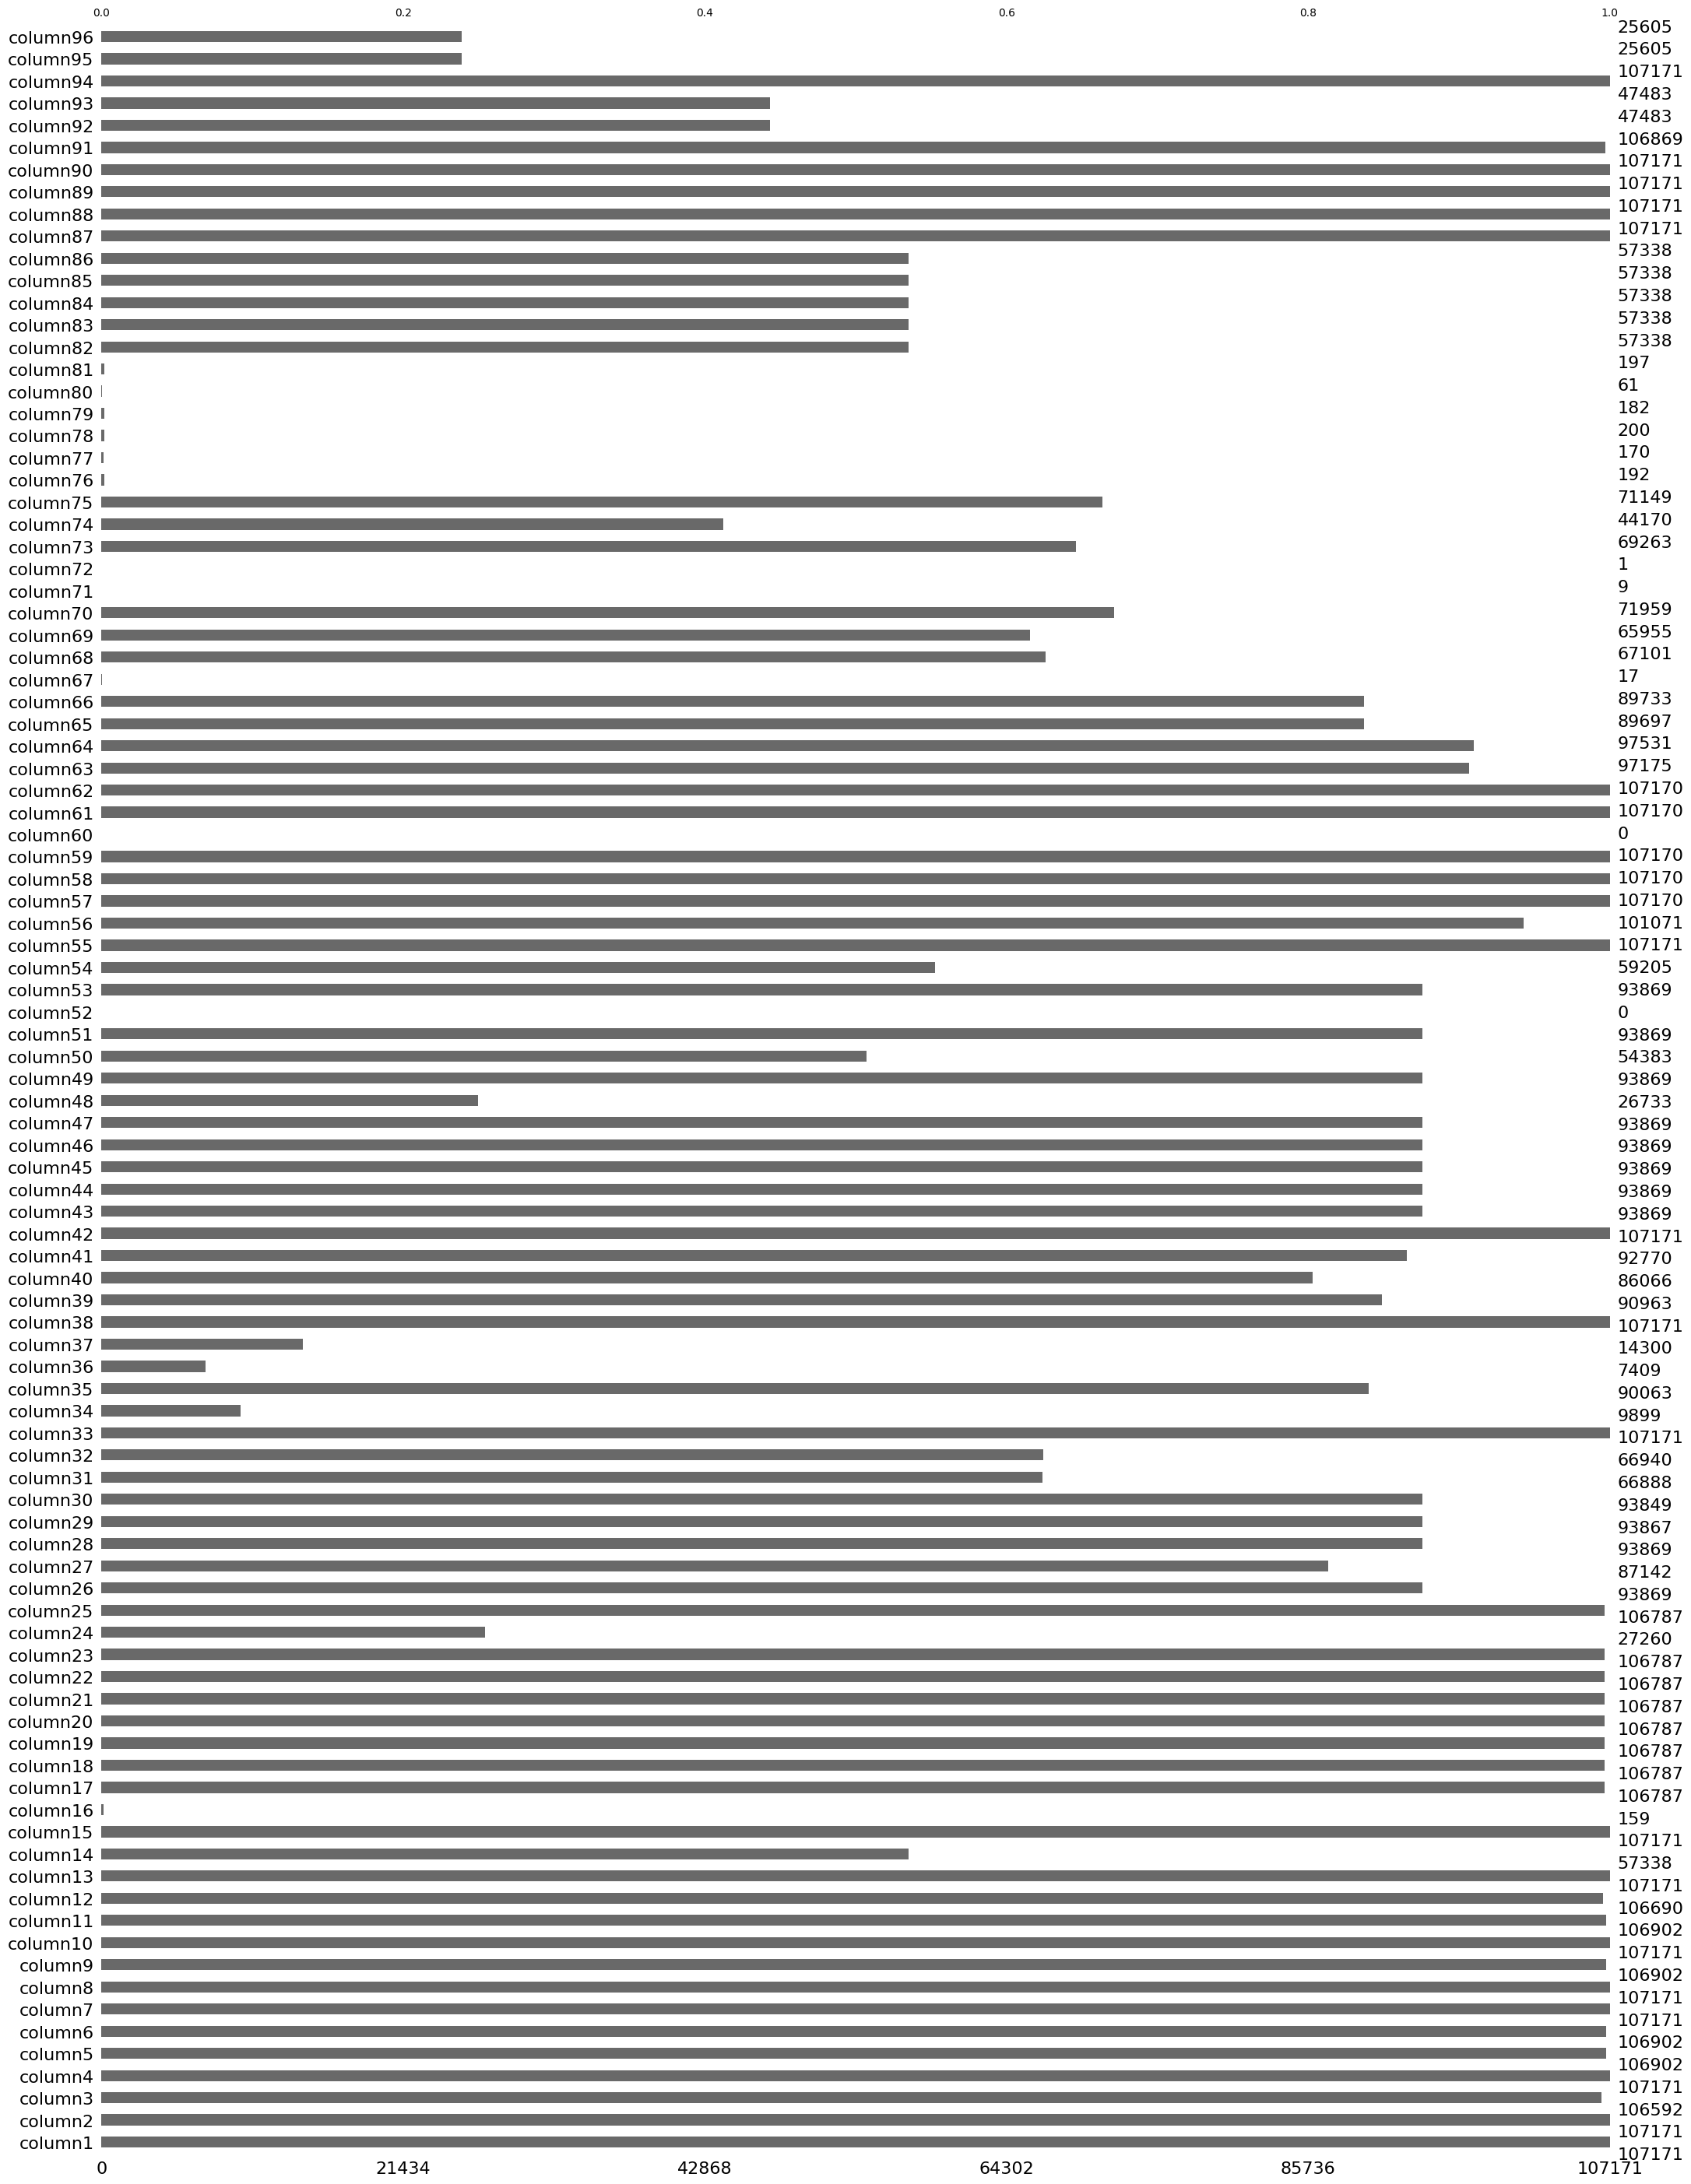

In [18]:
msno.bar(df)
plt.show()

In [27]:
df.dropna(how='all',inplace=True)

In [41]:
data = df[['column1','column2','column6','column7','column9','column10','column13','column18','column20','column28','column33','column35','column42','column43','column44','column45','column46','column47','column48','column49','column50','column51','column53','column54','column55','column56','column58','column59','column61','column68','column70','column84','column85','column88','column89','column90','column94',]]
data1 = df[['column1', 'column2', 'column6', 'column7', 'column9', 'column10', 'column13', 'column14', 'column15', 'column18', 'column20', 'column21', 'column22', 'column25', 'column26', 'column28', 'column30', 'column31', 'column33', 'column35', 'column42', 'column43', 'column44', 'column45', 'column46', 'column47', 'column48', 'column49', 'column50', 'column51', 'column53', 'column54', 'column55', 'column56', 'column58', 'column59', 'column61', 'column68', 'column70', 'column73', 'column74', 'column75', 'column77', 'column79', 'column84', 'column85', 'column88', 'column89', 'column90', 'column94']]

In [48]:
data2 = df[['column6','column7','column13','column18','column20','column28','column33','column43','column44','column45','column46','column47'
             ,'column49','column51','column53','column58','column61','column70','column84','column85']]
data2.head()

,column6,column7,column13,column18,column20,column28,column33,column43,column44,column45,column46,column47,column49,column51,column53,column58,column61,column70,column84,column85
0,ASS,3101,N,P2,2.0,339.0,Diesel,O,O,O,O,O,N,N,O,$ASSU,$HCI,NaN,NaN,NaN
1,ASS,3101,N,P2,1.0,339.0,Diesel,O,O,N,N,N,O,N,O,$ASSU,$HCI,NaN,NaN,NaN
2,ASS,3101,N,P13,1.0,339.0,Diesel,O,O,O,O,N,O,N,O,$ASSU,$HCI,NaN,NaN,NaN
3,ASS,3101,N,P13,1.0,339.0,Diesel,O,O,O,O,N,O,N,O,$ASSU,$HCI,NaN,NaN,NaN
4,INTE,3101,N,P2,2.0,339.0,Diesel,O,O,O,O,O,O,N,O,$ASSU,$HCI,NaN,NaN,NaN


In [43]:
data.columns

Index(['column1', 'column2', 'column6', 'column7', 'column9', 'column10',
       'column13', 'column18', 'column20', 'column28', 'column33', 'column35',
       'column42', 'column43', 'column44', 'column45', 'column46', 'column47',
       'column48', 'column49', 'column50', 'column51', 'column53', 'column54',
       'column55', 'column56', 'column58', 'column59', 'column61', 'column68',
       'column70', 'column84', 'column85', 'column88', 'column89', 'column90',
       'column94'],
      dtype='object')

In [39]:
data1.shape

(107171, 50)

In [46]:
data.shape

(94734, 51)

In [54]:
age_remplacer = ['age_cond','age_vehi','age_permas']
for age in age_remplacer:
    pourcentages = data[age].value_counts(normalize=True)
    num_null = data[age].isnull().sum()
    replacement_ages = np.random.choice(pourcentages.index, size=num_null, p=pourcentages.values)
    data.loc[data[age].isnull(), age] = replacement_ages

In [62]:
data['column94'].value_counts()

FLAGFRAU
0    38540
1    19909
Name: count, dtype: int64

<Axes: xlabel='FLAGEXT', ylabel='count'>

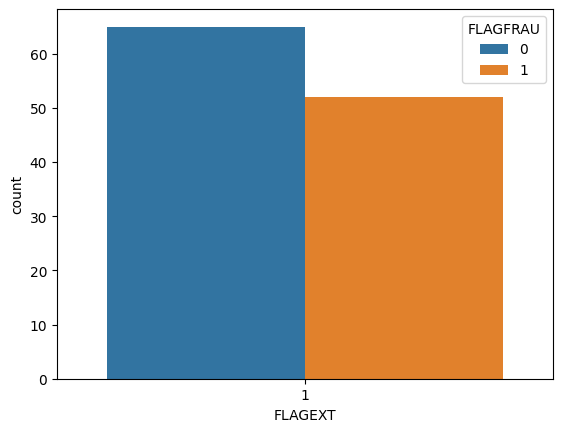

In [94]:
dat = data[data['column68']==1]
sns.countplot(x='column68',hue='column94',data=dat)

In [44]:
categorical_df = data.select_dtypes(include=['object'])
categorical_df.head()

,column6,column13,column18,column33,column42,column43,column44,column45,column46,column47,column49,column51,column53,column54,column56,column58,column61,column70,column84,column88,column89,column90,column94
0,ASS,N,P2,Diesel,"1,2",O,O,O,O,O,N,N,O,8000,"4826,59",$ASSU,$HCI,NaN,NaN,4176,0,4176,N
1,ASS,N,P2,Diesel,"0,9",O,O,N,N,N,O,N,O,5000,"1469,76",$ASSU,$HCI,NaN,NaN,0,5000,0,N
2,ASS,N,P13,Diesel,"0,9",O,O,O,O,N,O,N,O,5000,"4482,04",$ASSU,$HCI,NaN,NaN,2256,0,2256,N
3,ASS,N,P13,Diesel,1,O,O,O,O,N,O,N,O,5000,"2837,91",$ASSU,$HCI,NaN,NaN,"1662,5",0,"1662,5",N
4,INTE,N,P2,Diesel,"0,9",O,O,O,O,O,O,N,O,5000,"1769,31",$ASSU,$HCI,NaN,NaN,0,5000,0,N


In [1]:
for categ in categorical_df.columns:
    ff = categorical_df[categ].unique()
    print(categ)
    print(ff)

NameError: name 'categorical_df' is not defined

In [48]:
numeric_df = data.select_dtypes(include=['int', 'float'])
numeric_df.shape

(58449, 31)

In [50]:
X_cat = pd.get_dummies(categorical_df, drop_first = True).astype(int)

In [51]:
X_cat.shape

(58449, 59)

In [52]:
sc = StandardScaler()
numeric_df = pd.DataFrame(sc.fit_transform(numeric_df),columns=numeric_df.columns)
numeric_df['column94'].replace(numeric_df['column94'].unique()[0],0, inplace = True)
numeric_df['column94'].replace(numeric_df['column94'].unique()[1],1, inplace = True)

In [53]:
X_cat.reset_index(drop = True, inplace = True)
numeric_df.reset_index(drop = True, inplace = True)

In [54]:
X = pd.concat([numeric_df, X_cat], axis = 1)
X.shape

(58449, 90)

In [57]:
X0 = X[X['column94'] == X['column94'].unique()[1]]#.sample(frac=1, replace=True , random_state=None)
X1 = X[X['column94'] == X['column94'].unique()[0]]#.sample(5000, replace=True , random_state=None)
X_fin = pd.concat([X0,X1]).reset_index(drop = True)
y = X_fin['column94']
z = X_fin.drop(['column94'],axis = 1)
X_fin['column94'].value_counts()

FLAGFRAU
0.0    38540
1.0    19909
Name: count, dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(z, y)

In [100]:
dtc_params = { 'criterion': ('gini', 'entropy', 'log_loss') , 'min_samples_leaf' : [5,10,20]}
dtc = DecisionTreeClassifier()
grid_dtc = GridSearchCV(dtc, dtc_params, n_jobs = -1, verbose = 1, scoring = ['precision','accuracy'], cv = 10 , refit = 'accuracy')
grid_dtc.fit(X_train, y_train)
dtc = grid_dtc.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [103]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [104]:
#dtc = DecisionTreeClassifier(class_weight={0:0.5,1:2})
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_proba = dtc.predict_proba(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#print(f"Probability: {y_proba[:20]}")

Training accuracy of Decision Tree is : 0.9019071083128023
test accuracy of Decision Tree is : 0.8665571751180455
[[8735  897]
 [1053 3928]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      9632
         1.0       0.81      0.79      0.80      4981

    accuracy                           0.87     14613
   macro avg       0.85      0.85      0.85     14613
weighted avg       0.87      0.87      0.87     14613



In [ ]:
rand_clf_params = { 'criterion': ('gini', 'entropy', 'log_loss') , 'max_features' : ('sqrt', 'log2', None) , 
                   'n_jobs' : [1,-1] , 'n_estimators' : np.arange(100, 201, 25).tolist()}
rand_clf = RandomForestClassifier()
grid_rand_clf = GridSearchCV(rand_clf, rand_clf_params, verbose = 1, cv=3 , scoring = 'accuracy') 
grid_rand_clf.fit(X_train, y_train)
rand_clf = grid_rand_clf.best_estimator_

In [ ]:
rand_clf =  RandomForestClassifier(class_weight={0:0.5,1:2})
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)
y_proba = rand_clf.predict_proba(X_test)
print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#print(y_proba[:100])

In [ ]:
xgb_params = { 'booster': ('gbtree', 'gblinear' ,'dart') ,'learning_rate' : [0.1, 0.01, 0.001] ,'tree_method' : ('exact', 'approx', 'hist'),
              'n_estimators' : np.arange(100, 201, 25).tolist(),'n_jobs' : [1,-1]}
xgb = XGBClassifier(max_depth = 0)
grid_xgb = GridSearchCV(xgb, xgb_params, verbose = 1, cv=3 , scoring = 'accuracy') 
grid_xgb.fit(X_train, y_train)
xgb = grid_xgb.best_estimator_

In [ ]:
xgb = XGBClassifier(max_depth = 0)
#class_weights=[1,2]
xgb.fit(X_train, y_train)#,sample_weight=[class_weights[cls] for cls in y_train])

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
y_proba = xgb.predict_proba(X_test)
y_proba_percentage = np.round(y_proba, 2)
print(f"Training Accuracy of XGB Classifier is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XGB Classifier is {xgb_acc} \n")

print(f"{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(classification_report(y_test, xgb.predict(X_test)))
#print(y_proba_percentage[:100])

In [ ]:
lgbm_params = { 'boosting': ('gbdt', 'rf', 'dart') , 'learning_rate': [0.1, 0.01, 0.001] , 'n_jobs' : [1,-1] , 'n_estimators' : np.arange(100, 201, 25).tolist()}
lgbm = LGBMClassifier(verbose = -1 , n_jobs= -1)
grid_lgbm = GridSearchCV(lgbm, lgbm_params, verbose = 1, scoring = 'accuracy' , error_score='raise') 
grid_lgbm.fit(X_train, y_train)
lgbm = grid_lgbm.best_estimator_

In [ ]:
lgbm = LGBMClassifier(class_weight={0:0.5,1:2})
#for X_i,y_i in zip(X_tout,y_tout):
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

In [ ]:
ada_params = {'n_estimators' : np.arange(100, 201, 25).tolist(), 'learning_rate' : [0.001, 0.01, 0.1],
              'algorithm' : ['SAMME', 'SAMME.R'], 'estimator' : [DecisionTreeClassifier(), RandomForestClassifier(),
             LogisticRegression()]}
ada = AdaBoostClassifier()
grid_ada = GridSearchCV(ada, ada_params, verbose = 1, scoring = 'accuracy') 
grid_ada.fit(X_train, y_train)
ada = grid_ada.best_estimator_

In [ ]:
ada = AdaBoostClassifier(estimator= RandomForestClassifier())
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
cat = CatBoostClassifier(verbose = 0,class_weights={0:1,1:2})
cat.fit(X_train, y_train)

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

In [ ]:
etc = ExtraTreesClassifier(class_weight={0:0.5,1:2})
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

In [ ]:
lda = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5)
result = cross_val_score(lda, X_train, y_train, cv=kfold, scoring='accuracy')
print(result.mean())
lda.fit(X_train, y_train)

print(f"{confusion_matrix(y_test, lda.predict(X_test))}\n")
print(classification_report(y_test, lda.predict(X_test)))

In [ ]:
joblib.dump(dtc,'dtc.joblib')

In [ ]:
joblib.dump(rand_clf, 'randf.joblib')

In [ ]:
joblib_file = "xgb_model.joblib"
joblib.dump(xgb, joblib_file)

In [ ]:
joblib.dump(lgbm,'lgbm.joblib')

In [ ]:
joblib.dump(ada,'ada.joblib')

In [ ]:
joblib.dump(cat,'cat.joblib')

In [ ]:
joblib.dump(etc,'etc.joblib')

In [ ]:
joblib.dump(lda,'lda.joblib')

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
joblib_file = "svc_model.joblib"
joblib.dump(svc, joblib_file)

In [ ]:
dtc=DecisionTreeClassifier(class_weight={0:0.5,1:2})
rand_clf =  RandomForestClassifier(class_weight={0:0.5,1:2})
xgb = XGBClassifier(max_depth = 0)
lgbm = LGBMClassifier(verbose = -1,class_weight={0:0.5,1:2})
ada = AdaBoostClassifier(estimator= RandomForestClassifier())
cat = CatBoostClassifier(verbose = 0,class_weights={0:1,1:2})
etc = ExtraTreesClassifier(class_weight={0:0.5,1:2})
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()
svc = SVC(probability=True)
models = {
    'dtc':dtc,
    'rdf':rand_clf,
    'xgb':xgb,
    'lgbm':lgbm,
    'ada':ada,
    'cat':cat,
    'etc':etc,
    'lda':lda,
    'knn':knn,
    'gnb':gnb,
    'svc':svc
}
results = []

for model_name, model in models.items():
    start_time = time.time()  # Démarrer le chronomètre
    model.fit(X_train, y_train)  # Entraîner le modèle
    end_time = time.time()  # Arrêter le chronomètre
    
    # Prédictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calcul des métriques avec classification_report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extraction des métriques
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, average='macro', multi_class='ovo') if y_prob is not None else None

    # Temps d'exécution
    execution_time = end_time - start_time

    # Ajouter les résultats à la liste
    results.append({
        'Modèle': model_name,
        'Précision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'ROC-AUC Score': roc_auc,
        'Temps d\'exécution (s)': execution_time
    })

# Créer un DataFrame pandas pour afficher les résultats
df_results = pd.DataFrame(results)
df_results